# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print( "Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

C:\Users\KRapes\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\KRapes\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print( "Statistics for Boston housing dataset:\n")
print( "Minimum price: ${:,.2f}".format(minimum_price))
print( "Maximum price: ${:,.2f}".format(maximum_price))
print( "Mean price: ${:,.2f}".format(mean_price))
print( "Median price ${:,.2f}".format(median_price))
print( "Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
RM: I expect an increase in the number of rooms to result in an increase in the home value. More rooms can signify more potiential for a home. An example being if an invester was looking to buy a house to rent on the market. More bedrooms would allow the invester to rent to more people or bigger families, thus increasing his/her pool of potiential clients. On the other hand if a family was looking to live in a house more rooms could signify more square footage or more comfortable accomadation. An example being if every bedroom had a personal bathroom. 

LSTAT: I expect an increase in the percentage of homeowners in a neighborhood considered "lower class" to result in a decrease in home value. If a house is in an area with less wealth it's likely that public services/structures/spaces are also of a more economical nature. 

PTRATIO: I expect an increase in the ratio of students to teachers in primary and secondary schools to result in a decrease in the home value. With less students in a classroom, ie a lower PTRATIO, it can be infered that the students will recieve a better education. The quality of education for a child has great value to a family, and thus they are more probable to pay a preimum price to recieve it. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    #print(score)
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print( "Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
Given the nature of the R^2 value ANY positive number indicates that the model is more likely to produce desirable results than guessing the mean everytime. Following this logic, yes the model is capturing the variation of the target variable. However, to declare a model "successful" is more subjective. To be able to give a definitive yes or no answer would require a minimum  acceptance level to be disclosed before the calculations were conducted. In this specific example no such proclaimation was made. 
Never the less, an R^2 value of .923 suggest that less than 10% of the error is unexplained by the model. In my unanchored opinion this model successfully captured the movement of the target variable.  

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=5)

# Success
print( "Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
Unrecognized overfitting. If you don't have a method of testing your model it is impossible to know if any given improvement is truely benifiting the model or overfitting it to the training set. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

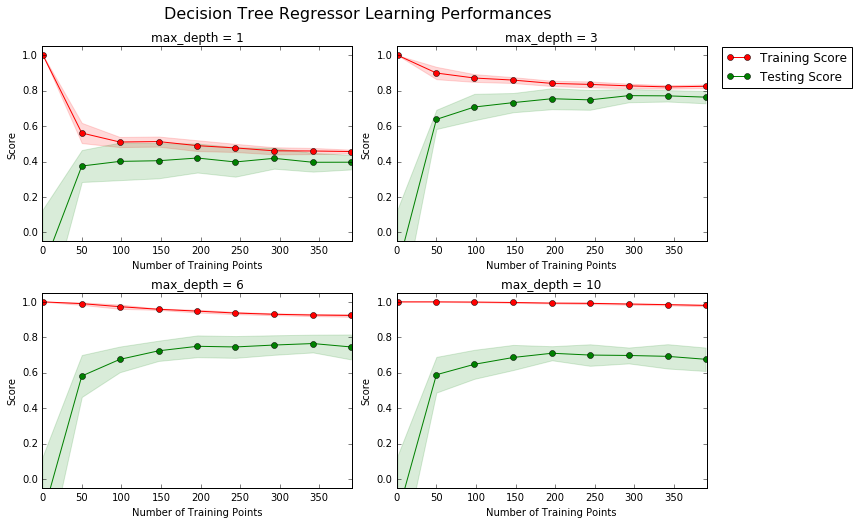

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
Max_depth = 3
As more data points are added the score of the training curve decreases.
As more data points are added the score of the testing curve increases.
After 150 data points the scores appear platue and after 300 little to no change can be seen. The two lines do appear to be converging to some common ground far in the distance, but massive amount of data would need to be added to reach this point. So as an overall statement I will say NO, added training points in increments of 50 will not benefit the model. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

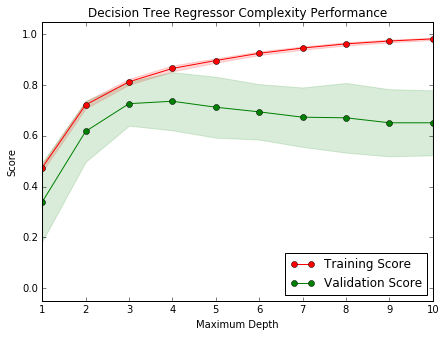

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
When the model is trained with a maximum depth of 1 it suffers from high bias. One visual clue is its position on the Maximum Depth scale, 1 is the lowest complexity possible. The other clue is that the training model also has a very similar error. 

When the model is trained with a maximum depth of 10 it suffers from high variance. One visual clue is its position on the Maximum Depth scale, 10 is the largest complexity possible. The other clue is that the training model has a much smaller and significant different error.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
A maximum depth of four appears to have the highest vaildation score.

However, an arguement can be made for three because it has almost the exact same score with a much lower variance between the training and test sets. On a different distrubition of testing data it is very possible that the validation score is different, (possibly lower) from this score and could be lower than the score for 3; in which case three is the overwhelming winner. 

Because the difference in scores between 3 and 4 is so small and yet the difference in varance is large I pick three as my first choice model. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
Grid search is a technique of systematically trying different combinations of parameters to find the best fit possible. It can be applied to any learning algorithm that has one or more varibles available for 'tuning'. The physical application is a few lines of code but the final result is a slower, heavier code with confidence that the model is the best option possible.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
K-fold cross-validation training is when the data is divided into k partes. k-1 of these parts are used for training while the last section is used for testing. This is repeated k times with a different section being isolated for testing each time. 

The benefit of k-fold is that you have a more accurate picture of what results the model is likely to produce. In the case of grid search you are less likely to have an abnormally high or low score due to chance. 

Using grid search without a cross-validated set puts the user at risk of making a decision based on a "one-off" result. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [34]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth": range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(mean_squared_error, greater_is_better=False)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [35]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print( "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
"Parameter 'max_depth' is 4 for the optimal model."

This is similar to my response in question 6. However, in question 6 I predicted an optimal max_depth of 3 because I was wary the higher variance associated with the depth 4. Now, after conducting this fit_model we can see when using the ShuffleSplit function the depth of 4 consistantly outpreformed 3. We can now state with more confidence that a depth of 4 produces the higest validation score. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [36]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print( "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $411,931.58
Predicted selling price for Client 2's home: $235,620.00
Predicted selling price for Client 3's home: $922,740.00


In [63]:
from sklearn.neighbors import NearestNeighbors
num_neighbors=3
def nearest_neighbor_price(x):
    def find_nearest_neighbor_indexes(x, X, num_neighbors):  # x is your vector and X is the data set.
        neigh = NearestNeighbors( num_neighbors )
        neigh.fit(X)
        distance, indexes = neigh.kneighbors( x )

        return indexes
    for num_neighbors in range(2,23,5):
        if num_neighbors != 2:
            num_neighbors = num_neighbors - 2
        indexes = find_nearest_neighbor_indexes(x, features, num_neighbors)
        sum_prices = []

        
        for i in indexes:
            sum_prices.append(prices[i])
        neighbor_avg = np.mean(sum_prices)
        print( "The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,index, neighbor_avg))
        
    return 0
index = 0  
for house in client_data:
    val=nearest_neighbor_price(house)
    index += 1
    print("")
    

The predicted 2 nearest neighbors price for home 0 is: $301,350.00
The predicted 5 nearest neighbors price for home 0 is: $372,540.00
The predicted 10 nearest neighbors price for home 0 is: $399,420.00
The predicted 15 nearest neighbors price for home 0 is: $402,640.00
The predicted 20 nearest neighbors price for home 0 is: $414,855.00

The predicted 2 nearest neighbors price for home 1 is: $170,100.00
The predicted 5 nearest neighbors price for home 1 is: $162,120.00
The predicted 10 nearest neighbors price for home 1 is: $196,770.00
The predicted 15 nearest neighbors price for home 1 is: $228,620.00
The predicted 20 nearest neighbors price for home 1 is: $229,005.00

The predicted 2 nearest neighbors price for home 2 is: $806,400.00
The predicted 5 nearest neighbors price for home 2 is: $897,120.00
The predicted 10 nearest neighbors price for home 2 is: $870,450.00
The predicted 15 nearest neighbors price for home 2 is: $803,180.00
The predicted 20 nearest neighbors price for home 2 

C:\Users\KRapes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\KRapes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\KRapes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationW

**Answer: **
Statistics for Boston housing dataset:

Minimum price: $105,000.00

Maximum price: $1,024,800.00

Mean price: $454,342.94

Median price $438,900.00

Standard deviation of prices: $165,171.13


Range of home prices within one STD: $289,171.89 - $619,514.83

Homes 2 and 3 fall outside of one std of the mean price. However, they are relativly close to their predicted neighbors. 

It should be noted that the predicted house prices were consistently higher than even the mean of 20 neighbors or in the extreme case for client #3 its 2 nearest neighbors**. This can in part be explained by the nature of a "mean"; if you are taking the 20 houses closest in features to the clients home 10 (or half) should be of a lower quality. These lower quality homes will pull the mean down away/below the predicted price of the clients home. 

**(The extreme cases are different for 1&2 vs 3 because they are on oppsite sides of the dataset mean)

In the case of 2 nearest neighbors the effect mentioned above is minimized but you can still see that the predicted price is around $100,000 higher than the neighbor's prices. 

In conclusion I feel the predicted prices are "fair" but are erroring on the high side. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [64]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

I don't expect this model to be a good predictor of real-world settings. 

For starters the data was collected in 1978 and was adjusted for inflation. Although it is not stated I'm going to assume the inflation rate used was the national average. While this number represents the general country, regional areas often have different rates. The second problem with using data almost 40 years old is the city has probably changed drastically in that time. Perhaps it was a hot spot for new jobs and young professsionals, or perhaps now it finds itself declining in population. The flux of population into or out of a city can have a large impact on housing prices. Third, the overall state of the economy and mindset of consumers has changed. While in the past teacher-student ratios might have been a big deal, in today's world there could be fewer couples with kids or couples waiting longer to have kids, which would result in the student-teacher ratio having a smaller impact on price. 

The model only takes into account three features and location is not one of them. The tag line of real-estate is "Location, Location, Location" while this may not be "Law" it is something that has the potential to sway a price drastically. By not taking this account you are saying all houses are priced the same. From downtown Boston, to flat farm land of Indiana, beach-front properity in LA or waterless/lifeless tracks of land in the deserts of Texas a two-bedroom house is a two-bedroom house. A quick search on Zillow confirms that this is not true. 

My final concern was expressed in question 10. Two houses, one which scored worse in all three catorgies, recieved the same price. This leads me to be leary of other results. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.